In [17]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [18]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_stage2_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [19]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [20]:
coverage_df = coverage_df.drop(["Tree val", "Naive"], axis=1)
coverage_df

,1.0,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,1.000000,1.000000,0.833333,0.857143,1.000000,0.833333
1,1.000000,0.833333,1.000000,1.000000,0.833333,1.000000
2,0.500000,1.000000,1.000000,0.833333,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,0.833333,0.666667,1.000000,0.833333
0,1.000000,0.833333,1.000000,1.000000,1.000000,1.000000
1,0.833333,0.857143,0.833333,1.000000,1.000000,0.833333
2,0.714286,0.833333,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,0.666667,1.000000,0.833333
4,0.666667,1.000000,0.833333,0.833333,0.666667,0.500000


In [21]:
length_df = length_df.drop(["Tree val", "Naive"], axis=1)
length_df

,1.0,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,2.101828,3.895045,2.847981,2.610729,2.221367,2.004146
1,2.080014,3.881247,2.857391,2.431454,2.153402,2.011266
2,1.588627,3.892569,2.878134,2.449271,2.205467,2.020659
3,1.940358,3.899004,2.842823,2.220965,2.191617,1.837562
4,2.099173,3.808812,2.941760,2.424997,2.174680,1.987001
0,2.780595,3.912372,3.084598,2.632888,2.185007,2.046931
1,2.141180,4.167044,2.881337,2.619971,2.349085,2.049120
2,1.975975,3.910788,3.053345,2.580346,2.324237,2.012708
3,1.943839,3.884613,2.851454,2.429276,2.171881,2.035370
4,2.681049,3.875225,2.863781,2.433610,2.203297,2.053100


In [22]:
MSE_df = MSE_df.drop(["Tree val", "Naive"], axis=1)
MSE_df

,1.0,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,4.754626,5.724732,5.861563,4.959129,5.453345,5.903943
1,5.007723,4.709248,4.827129,4.688048,4.627214,4.768680
2,5.004523,4.553102,4.918423,4.947749,5.058473,5.104218
3,6.023852,5.466016,5.524901,5.649114,5.561093,6.271310
4,3.863381,4.155620,4.311787,4.111504,4.215628,4.186441
0,5.139359,5.107367,5.109075,5.083739,5.121182,5.350298
1,4.188104,4.040889,4.131639,3.978709,4.125457,3.882447
2,4.528056,4.526965,3.723519,4.153057,3.987394,4.421936
3,5.116445,5.264844,5.350954,5.497759,5.936249,5.552835
4,4.593354,4.870712,4.949053,4.639511,4.881771,4.998895


In [23]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        sns.boxplot(data=df, ax=axes[i], palette=palette)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            if len_baseline_key:
                axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(0,MSE_lim)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 RRT(1)     0.892624
UV(0.1)    0.908310
UV(0.2)    0.920261
UV(0.3)    0.883193
UV(0.4)    0.920915
UV(0.5)    0.867880
dtype: float64
Length :
 RRT(1)     2.227962
UV(0.1)    3.939465
UV(0.2)    2.906389
UV(0.3)    2.461604
UV(0.4)    2.224920
UV(0.5)    2.039318
dtype: float64
MSE :
 RRT(1)     4.569523
UV(0.1)    4.633115
UV(0.2)    4.658153
UV(0.3)    4.786412
UV(0.4)    4.784424
UV(0.5)    4.860679
dtype: float64


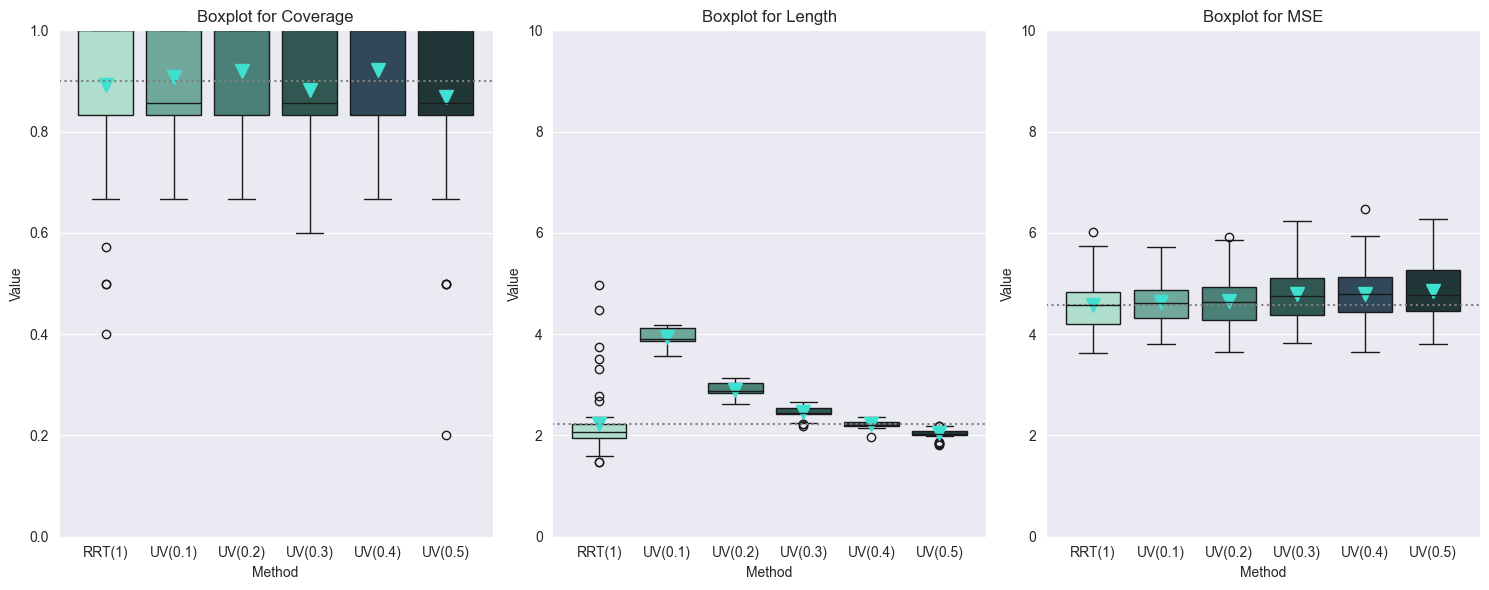

In [24]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=10,
         len_baseline_key="RRT(1)",
         MSE_baseline_key="RRT(1)",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["RRT(1)", "UV(0.1)", "UV(0.2)", "UV(0.3)", "UV(0.4)", "UV(0.5)"], 
         palette=["#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D", "#1E3A3A"])